# Competition
- solve the CIFAR10 dataset

# project outcomes
- get hands on Tensorflow/Keras
- you are not allowed to use transfer learning.
- any use of pretrained model will be ignored i.e. will not be graded
- get hands on solving the image recognition problem
- will help you get confidence on a harder data
- you have something to tell people that you managed to do
- search for a better solutions that may improve your model
- understanding each part of the network and how it impacts your result


# Import your modules

In [1]:
# do your imports here
import os
import time
import keras
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from tensorflow.image import resize
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense , Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD

# Load the CIFAR10 data from keras
This is one of the popular datasets for the image recognition task specially in the early researchs even popular CNN architectures like Resnet50 scored 95% acc on this data so don't worry if you couldn't achieve high results.

use that dictionary to name the classes
```python
id2class = {
    "0": "airplane", "1": "automobile", "2": "bird", 
    "3": "cat", "4": "deer", "5": "dog", "6": "frog", 
    "7": "hourse", "8": "ship", "9": "truck"
}
```

> visualize some random images using the helper function **`plot_batch`** below!

you can use this code to generate a random batch ids

```python
>>> random_ids = np.random.randint(0, 1000, BATCH_SIZE)

```
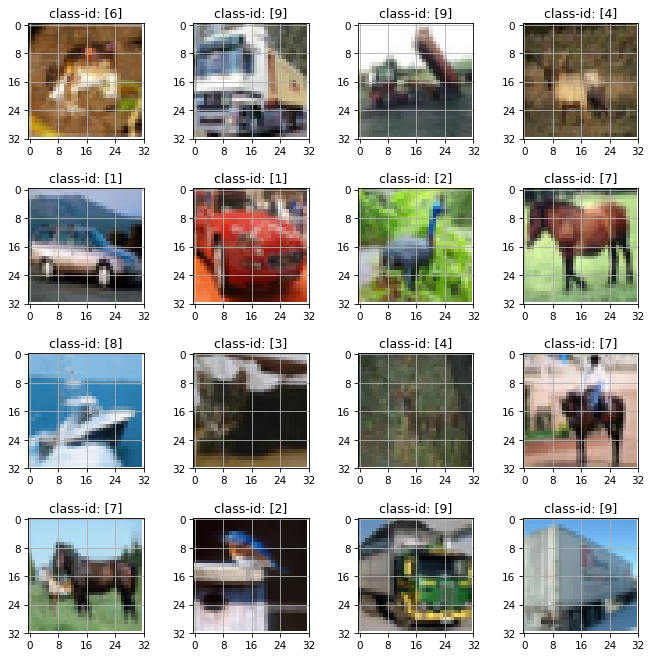

In [2]:
id2class = {
    "0": "airplane", "1": "automobile", "2": "bird", 
    "3": "cat", "4": "deer", "5": "dog", "6": "frog", 
    "7": "hourse", "8": "ship", "9": "truck" }

In [3]:
def plot_batch(X, Y, figSize=(9, 9), dpi=75, cells_per_col=4, color=None):
    """
    This function plots a batch of the raw images with its true targets

    Parameters
    ----------
    X : (np.ndarray)
        batch of images to classify and plot

    Y : (np.ndarray)
        batch of predicted labels

    figSize : (tuple)
        initialize the figure size

    dpi : (int)
        increase/decrease zoom of subplots

    cells_per_col : (int)
        max number of columns in the figure

    color : (str)
        change the color map of the image plot
    """
    
    m = len(X)  # length of the batch
    img_size = X[0].shape
    fig = plt.figure(figsize=figSize, dpi=dpi)  
    for i in range(m):  # for each img in the batch
        class_id = Y[i] # get the current image true value 
        axis = fig.add_subplot(round(m/cells_per_col), cells_per_col, i+1) # display a grid of subplots
        axis.imshow(X[i], cmap=color)                   # plot each image
        axis.set_title("class-id: " + str(class_id))    # set the title of the img with the ture value
        axis.set_xticks(np.linspace(0, img_size[1], 5)) # scale the x-axis to match the image width
        axis.set_yticks(np.linspace(0, img_size[0], 5)) # scale the y-axis to match the image height
        axis.grid()
    fig.tight_layout(pad=1.5)
    plt.show()

In [4]:
# load the dataset here
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

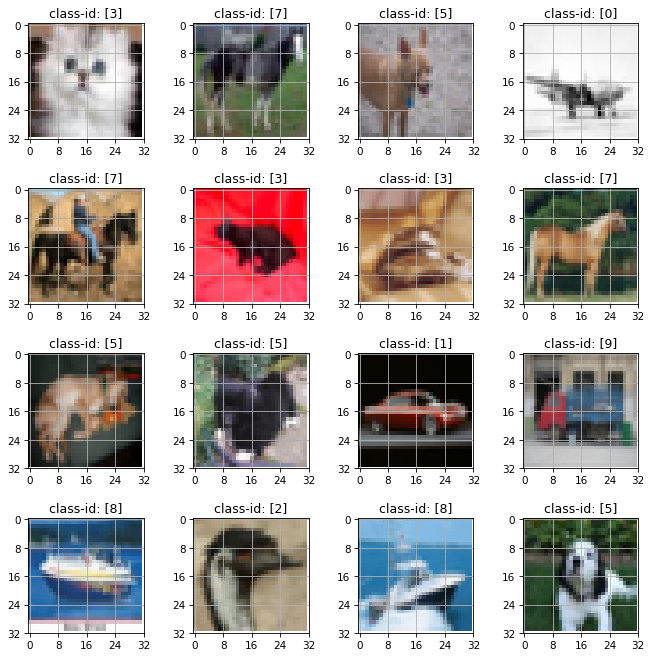

In [5]:
# index a random batch of the images, targets array and plot it

idx = np.random.randint(0, 1000, size=16)
plot_batch(Xtrain[idx], Ytrain[idx], figSize=(9, 9), dpi=75, cells_per_col=4, color=None)

# preprocess the images and target arrays
* scale the images pixels from $[0:1]$
* reshape `"flatten"` the images into the proper shape the ANN will expect
* one hot encode the targets to match the neuarl network output


In [6]:
# rescale the images pixels values
Xtrain = Xtrain / 255 
Xtest = Xtest / 255

# print min and max values in the images array
print(f'min value: {Xtrain.min()}')
print(f'max value: {Xtrain.max()}')

min value: 0.0
max value: 1.0


In [7]:
# one hot encode the target vectors
Ytrain = to_categorical(Ytrain)
Ytest = to_categorical(Ytest)

# print the new shape of the targets
print("Ytrain shape after encoding:", Ytrain.shape)
print("Ytest shape after encoding:", Ytest.shape) 

'\n# one hot encode the target vectors\nYtrain = to_categorical(Ytrain)\nYtest = to_categorical(Ytest)\n\n# print the new shape of the targets\nprint("Ytrain shape after encoding:", Ytrain.shape)\nprint("Ytest shape after encoding:", Ytest.shape) \n'

In [8]:
# split the train into train/validation print their shapes 

x_train, x_val, y_train, y_val = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=42, shuffle=True)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (40000, 1) (10000, 1)


In [9]:
# Resizing of the images from 32x32 to 227x227.
# The AlexNet network input expects a 227x227 image.

def process_images(image, label):
    # Resize images from 32x32 to 277x277
    image = resize(image, (227,227))
    return image, label    

shape before resizing: (32, 32, 3)
shape after resizing: (227, 227, 3)


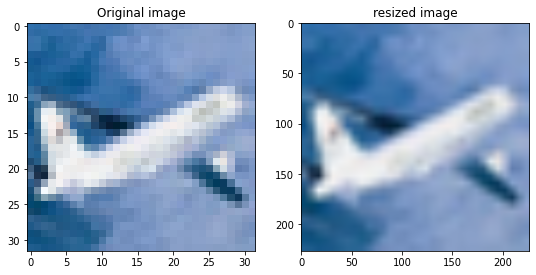

In [10]:
random_idx = np.random.randint(low=0, high=1000, size=1) # get a random index
random_idx = random_idx.item() # convert 1 dim array to just a number

or_img = x_train[random_idx] # original image
label = y_train[random_idx]

resized_img, label= process_images(or_img, label)
print(f'shape before resizing: {or_img.shape}')
print(f'shape after resizing: {resized_img.shape}')

plt.figure(figsize=(9,9))

plt.subplot(1, 2 ,1)
plt.title("Original image")
plt.imshow(or_img)

plt.subplot(1, 2 ,2)
plt.title("resized image")
plt.imshow(resized_img)

plt.show()

##tensorflow Data API
- Deep Learning systems are
often trained on very large datasets that will not fit in RAM. Ingesting a large dataset
and preprocessing it efficiently can be tricky to implement with other Deep Learning
libraries, but TensorFlow makes it easy thanks to the Data API: you just create a data‐
set object, tell it where to get the data, then transform it in any way you want, and
TensorFlow takes care of all the implementation details, such as multithreading,
queuing, batching, prefetching, and so on.

### define tensorflow pipeline.
* TensorFlow provides a suite of functions and operations that enables easy data manipulation and modification through a defined input pipeline.
* "tf.data.Dataset.from_tensor_slices" 
this  method takes the train, test, and validation dataset partitions and returns a corresponding TensorFlow Dataset representation.

In [11]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_data = tf.data.Dataset.from_tensor_slices((Xtest, Ytest))
val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))

In [12]:
# Empty some spaces
del x_train, Xtrain, Ytrain, y_train, Xtest, Ytest, x_val,y_val 

- prefetsh(): will speed up our model by working in parallel on getting the next batch ready while our training algorithm is working
on one batch
<img width="100%" src="https://canvas.education.lu.se/users/9031/files/448101/preview?verifier=yGvFUdX8pk62i7b5WDAqKbWCDH4OUxOIuDxu6jyP">

In [13]:
train_data = (train_data
                  .map(process_images)
                  .batch(batch_size=16, drop_remainder=True)
                  .prefetch(1))
test_data = (test_data
                  .map(process_images)
                  .batch(batch_size=16, drop_remainder=True)
                  .prefetch(1))
val_data = (val_data
                  .map(process_images)
                  .batch(batch_size=32, drop_remainder=True)
                  .prefetch(1))

# Build the Network (CNN)

<img width="100%" src="https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png?fit=1400%2C658&ssl=1">

> choose whatever works for you to build the network as we did in the class
using the [Sequential](https://www.tensorflow.org/guide/keras/sequential_model), [Functional](https://www.tensorflow.org/guide/keras/functional), or [subclass](https://www.tensorflow.org/guide/keras/custom_layers_and_models#the_model_class) model from [TF2](https://www.tensorflow.org/) try different number of layers, neurons per layer and different activation functions &rarr; [here](https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253), or [here](https://www.geeksforgeeks.org/activation-functions-neural-networks/)


use `model.summary()` or [plot_model](https://keras.io/api/utils/model_plotting_utils/) to visualize your model conncections


In [14]:
# build the network here
model = Sequential([
    # --------------- Feature extractor Network -----------------------
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),

    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),

    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),

    Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),

    Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    # --------------- Classifier Network -----------------------
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.2),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax')

])

# visualize the network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

# Configure the Loss/optimizer/metric

> use the [model.compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) to do that and specify the model arguments (loss=, metrics=, optimizer=)

> adam is not a dark magic works for everything you may try other [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) that can achieve more better, so
read more about the optimizers from [here](https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6), or [here](https://heartbeat.fritz.ai/exploring-optimizers-in-machine-learning-7f18d94cd65b) if you are curious about maths behind and I highly encourage doing so!

you can pass the **`optimizer argument`** as (str) &rarr; "Adam", or creating object from the optimizer class Adam(learning_rate=) if so choose a suitable **`lr`** value between $[10^{-2}:10^{-5}]$

for the **`metrics`** argument please specify at least the "accuracy" so I can score your model and set the bonus for the validation/test accuracy so monitore them in your callbacks

In [15]:
# configure the loss and optimizer and the metrics for the training

model.compile(SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Configure the training callbacks if any

open sugguestions [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks)
- **`class EarlyStopping`**: Stop training when a monitored metric has stopped improving.
- **`class ModelCheckpoint`**: Callback to save the Keras model or model weights at some frequency.
- **`class ReduceLROnPlateau`**: Reduce learning rate when a metric has stopped improving.

**`hint`**
> use small patience relative to eh epochs at the begining and monitor the validation [acc]

so you can stop the model early and tweak it better then rerun you will do that several times until you think it is the best way possible!



In [16]:
# configure the training callbacks if any

root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()  
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# Train the network

> use small number of epochs at the begining to allow you to edit the model faster
\
once you think you got a good model configs increase the epochs to a reasonable number between 100:1000 not less not more.

choose the values that works best for you of the training rules:
- **`epochs`**: iterations for each the model will see all the data
- **`batch_size`**: the number of batches for your optimizer {stochastic/mini_batch/full_batch} ensure that it matches the memory size
- **`validation_split`**: the ratio to split the training data into train/validation
- **`callbacks`**: the functions to apply within the training loop

> don't forget to save the history of the training you can use a callback for that or:
```python
    >>>> history = model.fit(...)
```


In [18]:
# feed the data and train the network
history = model.fit(train_data,
          epochs=20,
          validation_freq=1,
          shuffle=True,
          verbose=1, 
          validation_data=val_data,
          callbacks=[tensorboard_cb]
)

Epoch 1/20
   3/2500 [..............................] - ETA: 43:05 - loss: 3.2837 - accuracy: 0.1667

KeyboardInterrupt: ignored

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

%tensorboard --logdir logs

# save the model into tf file and the history to a csv file

save it using [tensorflow.keras.models.save_model()](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model#expandable-1)


```python
        tf.keras.models.save_model(
        model, filepath, overwrite=True, include_optimizer=True, save_format=None,
        signatures=None, options=None, save_traces=True
    )

```
**`model`** 	Keras model instance to be saved.
\
**`filepath`** 	One of the following:
String or pathlib.Path object, path where to save the model
h5py.File object where to save the model 
\
**`overwrite`** 	Whether we should overwrite any existing model at the target location, or **`instead`** ask the user with a manual prompt.
\
**`include_optimizer`** 	If True, save optimizer's state together.
\
**`save_format`** 	Either 'tf' or 'h5', indicating whether to save the model to Tensorflow SavedModel or HDF5. Defaults to 'tf' in TF 2.X. 
\
\
\
you can load it using [tensorflow.keras.models.load_model()](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model)


```python

    tf.keras.models.load_model(
        filepath, custom_objects=None, compile=True, options=None
    )

```

**`filepath`** 	One of the following:
String or pathlib.Path object, path to the saved model
h5py.File object from which to load the model 
\
**`custom_objects`** 	Optional dictionary mapping names (strings) to custom classes or functions to be considered during deserialization.
\
**`compile`** 	Boolean, whether to compile the model after loading.
\
**`options`** 	Optional tf.saved_model.LoadOptions object that specifies options for loading from SavedModel. 
\

In [ ]:
# save our model
save_model(model, './cifer10_model', overwrite=True)

In [ ]:
#load model
cifer10_model = load_model('./cifer10_model')

# Evaluate the model on testing data



In [ ]:
# print the accuracy, and loss scores on testing dataset
train_loss, train_acc = cifer10_model.evaluate(train_data, batch_size=32)
test_loss, test_acc = cifer10_model.evaluate(test_data, batch_size=32)

print(f"train acc: {train_acc}")
print(f"test acc: {test_acc}")

print(f"train loss: {train_loss}")
print(f"test loss: {test_loss}")

# Predict a batch from the test dataset and plot it 

> use Ypred_batch = [model.predict(Xtest_batch)](https://www.tensorflow.org/api_docs/python/tf/keras/Model)
\
 use `plot_batch(Xtest_batch, Ypred_batch)` to plot a test X &rarr; images batch, Y &rarr; predicted targets
 
make sure that the final Ypred_batch is array of int values of shape of (N, 1), or (N,) not (N, 10)
\
use batch size of 16 to index the test data and pass it to plot_batch

In [ ]:
# take a batch from test data
for item , label in test_data.take(1).as_numpy_iterator():
  test_batch = np.array(item)
  Ytest = np.array(label)
  print("shape of test batch:", test_batch.shape)
  print("shape of label:", label.shape)

In [ ]:
# 16 random indcies.
batch_of_16 = np.random.randint(0, 32, size=16) # 16 random indcies.

# predict the Ypred_batch
Ypred = cifer10_model.predict(test_batch).argmax(axis=1)
Ytest = Ytest.argmax(axis=1)

# plot the predicted batch
plot_batch(test_batch[batch_of_16], Ypred[batch_of_16], figSize=(9, 9), dpi=75, cells_per_col=4, color=None)


### showing True and predicted values

In [ ]:
print("True values:", Ytest[batch_of_16]) # print True labels
print("pred values:", Ypred[batch_of_16]) # print pred labels
print('-'*40)
for i in batch_of_16:
  print("True values:", id2class[str(Ytest[i])]) # print True corresponding class
  print("pred values:", id2class[str(Ypred[i])]) # print pred corresponding class
  print()